In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_ds='D:/ML/train'
test_ds='D:/ML/test'
validation_ds='D:/ML/valid'

In [4]:
os.listdir('D:/ML/train')

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [7]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [8]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [9]:
img= train_generator[0]
print(img)

(array([[[[ 96.      , 114.      ,  52.      ],
         [ 96.      , 114.      ,  52.      ],
         [ 96.      , 114.      ,  52.      ],
         ...,
         [108.68958 , 122.563194,  53.      ],
         [110.      , 123.      ,  53.498344],
         [108.26602 , 120.83252 ,  54.      ]],

        [[ 96.      , 114.      ,  52.      ],
         [ 96.      , 114.      ,  52.      ],
         [ 96.      , 114.      ,  52.      ],
         ...,
         [108.68832 , 122.562775,  53.      ],
         [110.      , 123.      ,  53.49792 ],
         [108.267715, 120.83464 ,  54.      ]],

        [[ 96.      , 114.      ,  52.      ],
         [ 96.      , 114.      ,  52.      ],
         [ 96.      , 114.      ,  52.      ],
         ...,
         [108.68704 , 122.56235 ,  53.      ],
         [110.      , 123.      ,  53.497498],
         [108.26941 , 120.83676 ,  54.      ]],

        ...,

        [[106.24002 , 117.11457 ,  57.11457 ],
         [106.24002 , 117.11457 ,  57.11457 

In [10]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

In [11]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [12]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
10
11


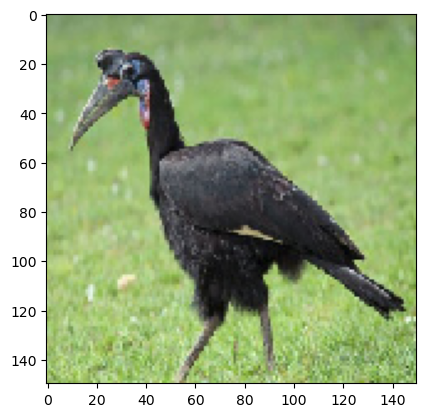

In [16]:
img=load_img('D:/ML/train/ABYSSINIAN GROUND HORNBILL/015.jpg',
 target_size=(150,150))
plt.imshow(img)

In [17]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

In [18]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(20, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [19]:
model = VGG19((224, 224, 3))

In [20]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                        

In [21]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [26]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=1)

101/101 [==============================] - 2786s 28s/step - loss: 2.9847 - accuracy: 0.0589 - val_loss: 2.9256 - val_accuracy: 0.0700


In [27]:
n_categories = len(os.listdir('D:/ML/train'))# number of categories print(n_categories)

In [28]:
n_categories


20

In [29]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.984736,0.058915,2.92562,0.07


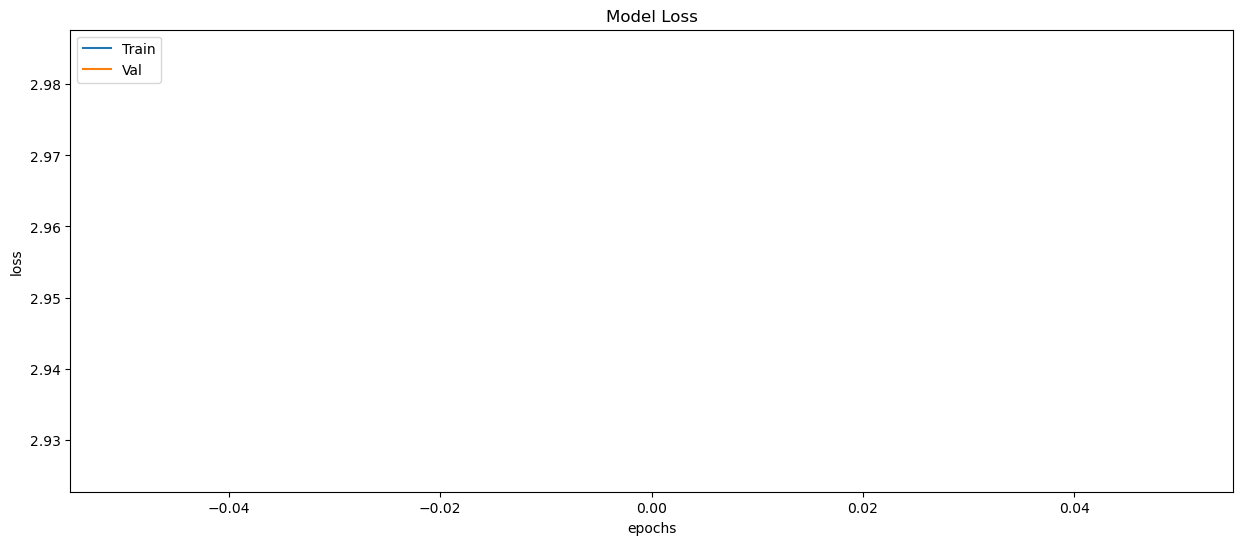

In [30]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

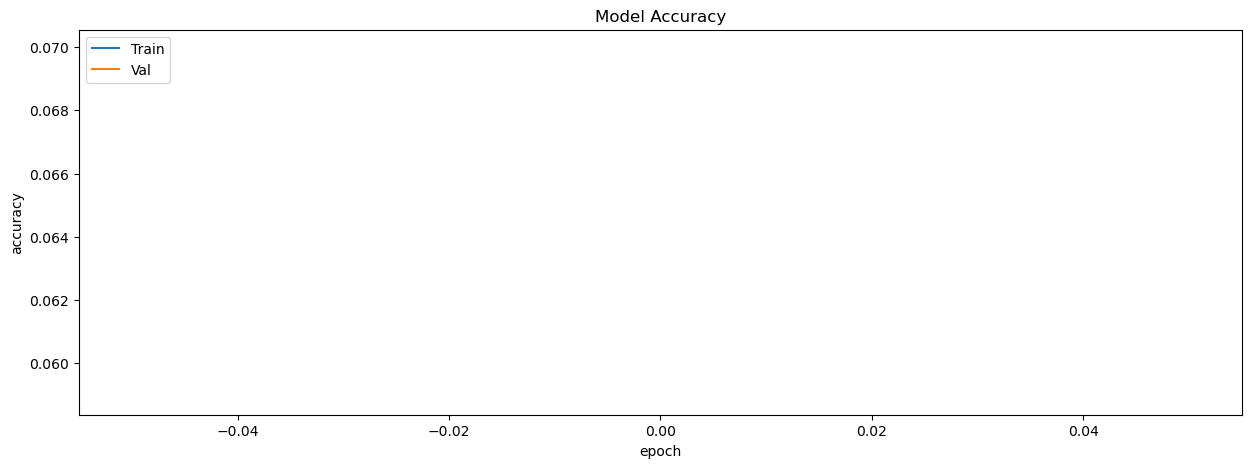

In [31]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [32]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 20s 4s/step


In [33]:
results =model.evaluate(test_generator)

4/4 [==============================] - 19s 4s/step - loss: 2.9155 - accuracy: 0.0700


1/1 [==============================] - 1s 1s/step


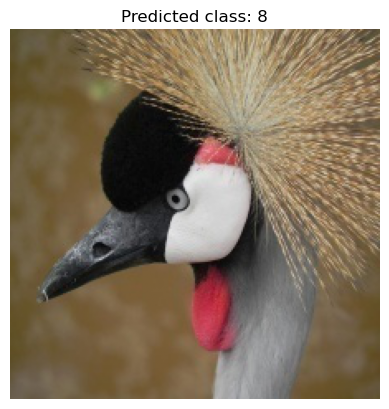

In [34]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory ='D:/ML/images to predict'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0
predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()